# **PROJECT-3: EDA & Feature Engineering for Hotel Rating Prediction**  

## **Problem Statement**  
I work as a Data Scientist at Booking.com. One of the challenges the company faces is **fraudulent hotels artificially boosting their ratings**.  
One approach to detecting such hotels is to build a **predictive model for hotel ratings**.  
If the model's predictions significantly differ from the actual ratings, the hotel might be engaging in rating manipulation.  

## **Objectives**  
- Conduct **Exploratory Data Analysis (EDA)** to identify key factors influencing hotel ratings.  
- Perform **Feature Engineering** to extract meaningful attributes for better predictions.  
- Train various **machine learning models** and compare their performance.  
- Provide **business insights** on how hotels manipulate ratings and how to detect such cases.  

## **Dataset Overview**  
This dataset comes from a **Kaggle competition** and contains:  
- **Hotel attributes** (location, price, number of reviews, etc.)  
- **Customer review data** (ratings, text reviews, timestamps)  
- **Target variable**: hotel rating (used for training the model)  
- **Test dataset** for evaluating model predictions  


## **Loading Required Libraries and Initial Data**

In [1]:
%%capture

# Standard Python libraries  
import os  
import time  

# Core Data Science libraries  
import numpy as np  
import pandas as pd  

# Visualization libraries  
import matplotlib.pyplot as plt  
%matplotlib inline  
import seaborn as sns  
import plotly.express as px  

# Preprocessing and data transformation  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.impute import SimpleImputer  
from sklearn.model_selection import train_test_split  # Splitting the dataset  
from sklearn import preprocessing  

# Suppressing warnings  
import warnings  
warnings.filterwarnings('ignore')  

# Sentiment analysis for text reviews  
from nltk.sentiment.vader import SentimentIntensityAnalyzer  
import nltk  

# Machine learning models  
from sklearn.ensemble import RandomForestRegressor  # Model training  
from sklearn import metrics  # Model evaluation  

# Data encoding libraries  
import category_encoders as ce  

# Statistical tests  
from scipy import stats  
import statsmodels.api as sm  
from statsmodels import stats as sms  

In [2]:
# Fixing RANDOM_SEED for code reproducibility  
RANDOM_SEED = 42  

In [3]:
# Loading data from the competition  

DATA_DIR = '/kaggle/input/sf-booking/'  
hotels_train = pd.read_csv(DATA_DIR + '/hotels_train.csv')  # Data for analysis and model training  
hotels_test = pd.read_csv(DATA_DIR + 'hotels_test.csv')  # Data for model testing  
submission = pd.read_csv(DATA_DIR + '/submission.csv')  # Submission format for the competition  

## **Data Exploration**

In [4]:
hotels_train.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [5]:
hotels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
hotels_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [7]:
print('Number of duplicates in the training set: {}'.format(hotels_train[hotels_train.duplicated()].shape[0]))  
print('Number of duplicates in the test set: {}'.format(hotels_test[hotels_test.duplicated()].shape[0]))  

Number of duplicates in the training set: 307
Number of duplicates in the test set: 29


The dataset consists of two parts: training and test sets.  

- The **training set** contains 17 features, 2 of which (*lat* and *lng*) have missing values.  
- The **test set** contains 16 features, as it does not include the target variable *reviewer_score*.  
  Like the training set, it also has missing values in *lat* and *lng*.  

To perform feature transformation and engineering, we need to create a combined dataframe that includes both sets.  
However, before merging, I will remove duplicates from the training set, as duplicates in the test set cannot be removed due to the fixed submission format required by the competition.  

In [8]:
# Removing duplicates from the training set  
hotels_train = hotels_train.drop_duplicates()  
print('Table size after removing duplicates: {}'.format(hotels_train.shape))  

Table size after removing duplicates: (386496, 17)


In [9]:
# Creating an additional feature to distinguish between training and test samples  
# Assigning 1 to training data and 0 to test data  
hotels_train['sample'] = 1  
hotels_test['sample'] = 0  

# Creating the missing "reviewer_score" feature in hotels_test and filling it with zeros  
hotels_test['reviewer_score'] = 0    

# Merging training and test data into a single dataset  
df = pd.concat([hotels_train, hotels_test], ignore_index=True)  
df['sample'] = df['sample'].astype('category')  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   hotel_address                               515431 non-null  object  
 1   additional_number_of_scoring                515431 non-null  int64   
 2   review_date                                 515431 non-null  object  
 3   average_score                               515431 non-null  float64 
 4   hotel_name                                  515431 non-null  object  
 5   reviewer_nationality                        515431 non-null  object  
 6   negative_review                             515431 non-null  object  
 7   review_total_negative_word_counts           515431 non-null  int64   
 8   total_number_of_reviews                     515431 non-null  int64   
 9   positive_review                             515431 non-null

In [11]:
df.describe(include='object')

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
count,515431,515431,515431,515431,515431,515431,515431,515431
unique,1493,731,1492,227,330011,412601,55242,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,4789,2584,4789,245165,127816,35924,5101,2584


Для 8 признаков с типом данных *object* невозможно визуализировать значимость для целевого признака без преобразования.

В глаза бросается не соответствие признаков *hotel_address* и *hotel_name* - названий отелей меньше, чем адресов, по которым они расположены. Значит существуют одноименные отели. 

Признак *days_since_review* можно легко преобразовать в числовой.

Признак *tags* имеет странный синтаксис - выглядит, как список, хоть это строка.

In [12]:
df.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,515431.000000,515431.000000,515431.000000,515431.000000,515431.000000,515431.000000,515431.000000,512163.000000,512163.000000
mean,498.275079,8.397630,18.539760,2744.259084,17.777342,7.165215,6.296715,49.442788,2.824057
std,500.618961,0.548033,29.690973,2317.823718,21.803204,11.038742,3.902967,3.467323,4.580730
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,48.214277,-0.143372
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,7.900000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


Для числовых признаков выведем влияние на целевую характеристику при помощи визуализации

In [13]:
# Extracting numerical feature names as a list for further processing  
types = df.dtypes  
num_features = list(types[(types != 'object')].index)  

# Removing uninformative features from the list  
del num_features[9:10]  

num_features  

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng']

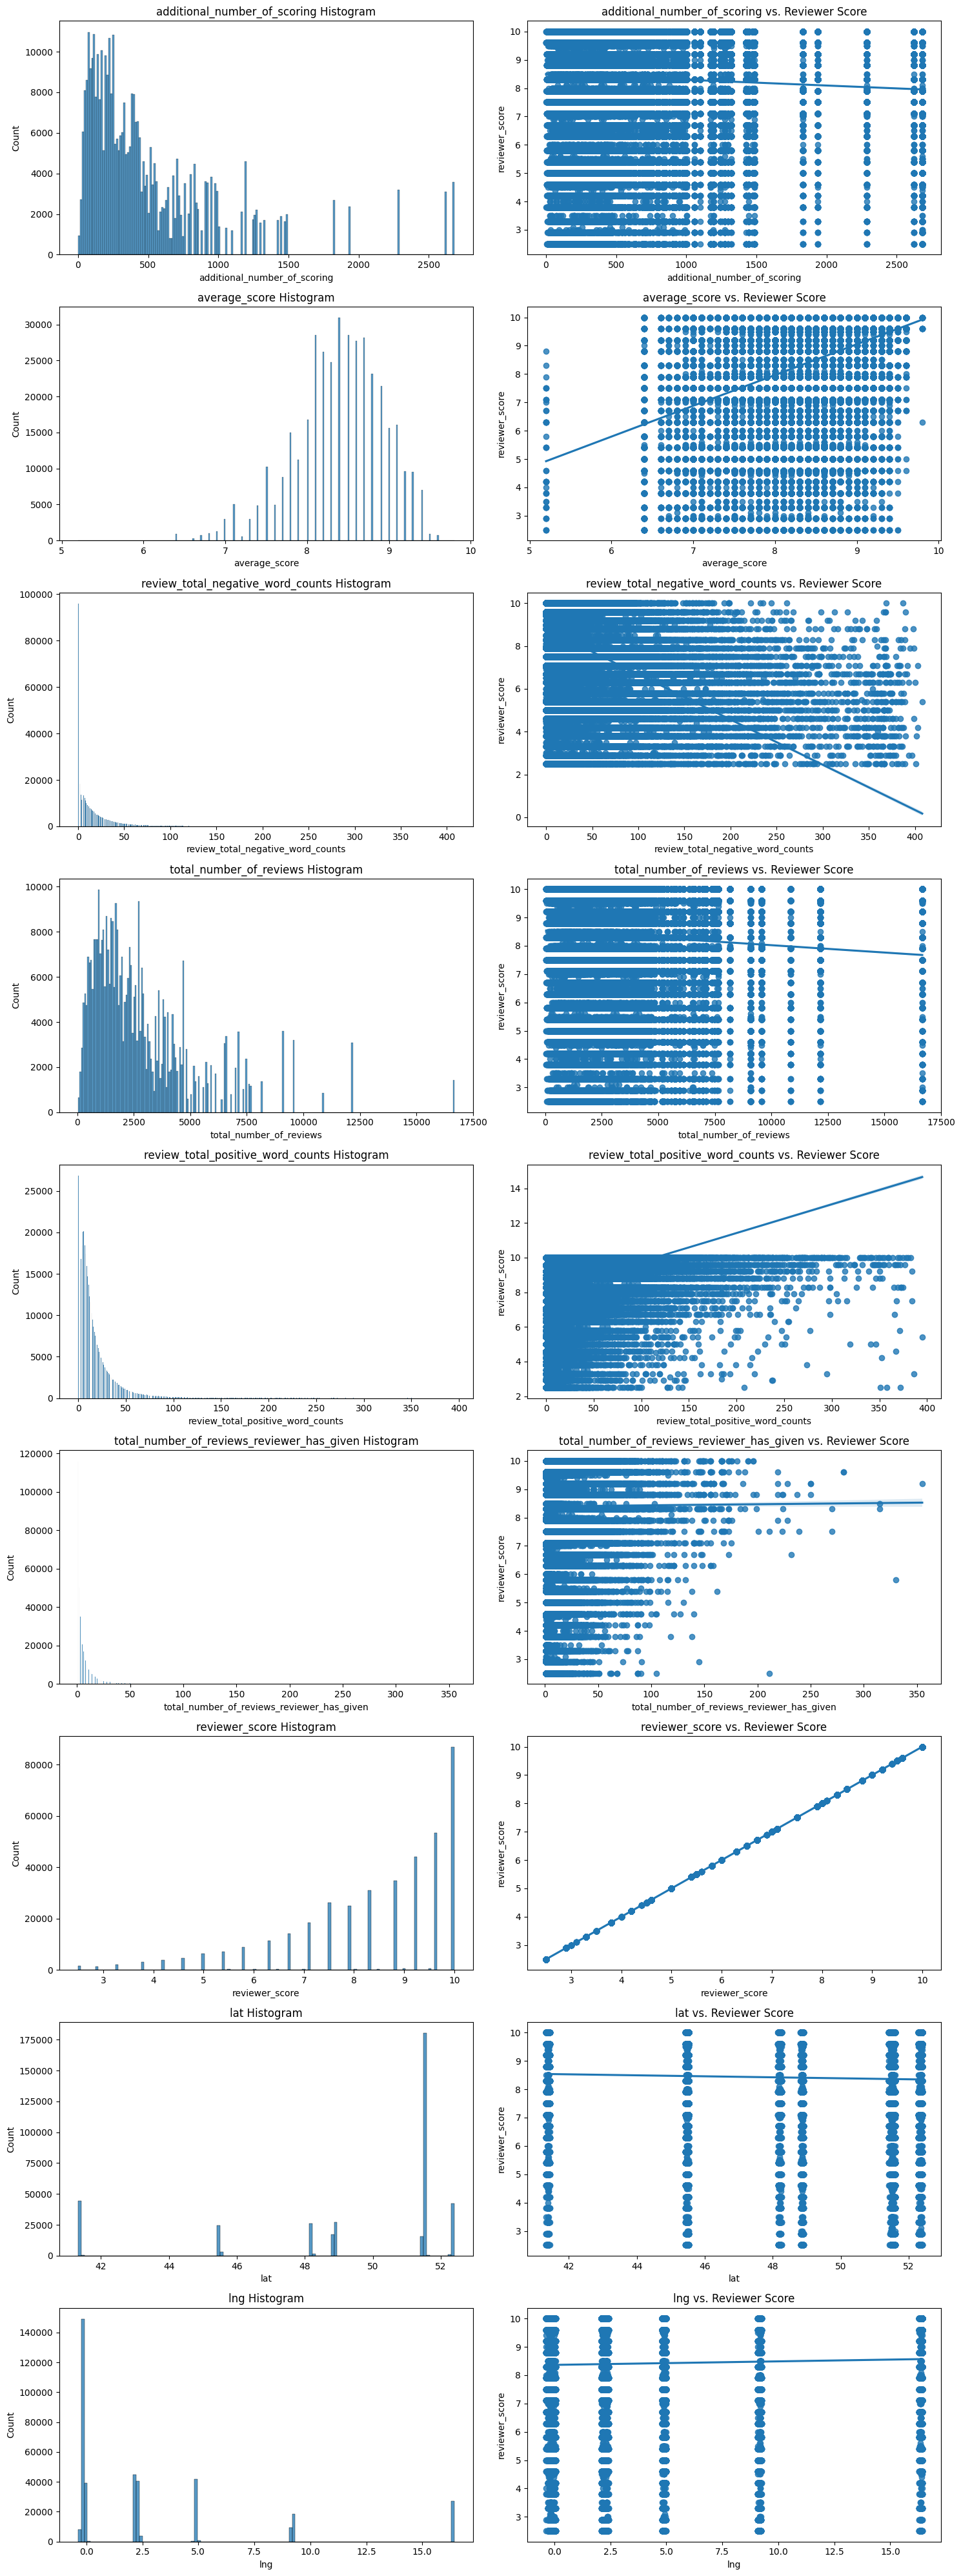

In [14]:
n = len(num_features)  # Number of numerical features  
fig, axes = plt.subplots(n, 2, figsize=(15, 40))  # Creating a figure with n x 2 subplots  

# Looping through all numerical features  
for i, feature in enumerate(num_features):  # i - index, feature - feature name in the dataset  
    # Plotting the histogram for feature distribution  
    histplot = sns.histplot(data=df[df['sample'] == 1], x=feature, ax=axes[i][0])  
    histplot.set_title('{} Histogram'.format(feature))  # Adding a title to the plot  

    # Plotting scatter plot with linear regression  
    regplot = sns.regplot(data=df[df['sample'] == 1], x=feature, y='reviewer_score', ax=axes[i][1])  
    regplot.set_title('{} vs. Reviewer Score'.format(feature))  # Adding a title to the plot  

plt.tight_layout()  # Adjusting layout for better readability  

### **Key Insights from Numerical Feature Visualization:**  
- The distribution of all numerical features, except for *average_score*, does not follow a normal distribution.  
- The distribution of *average_score* visually resembles a normal distribution, but this needs to be confirmed with statistical tests.  
- There is a **positive correlation** between the target variable and *average_score* and *review_total_positive_word_counts*,  
  as well as a **negative correlation** with *review_total_negative_word_counts*.  

These features should be given special attention when building the model.  

## **Data Preparation**  

### **Handling Missing Values**  

Our dataset contains missing values in only two features: latitude (*lat*) and longitude (*lng*).  

These missing values can be filled using the *hotel_address* feature,  
as all these attributes represent the geographic location of the hotel.  


In [15]:
null_df = df[df['lat'].isnull() | df['lng'].isnull()]['hotel_address'].value_counts()
null_df

hotel_address
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
4 rue de la P pini re 8th arr 75008 Paris France               290
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            147
Bail n 4 6 Eixample 08010 Barcelona Spain                      146
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             93
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               61
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        57
23 Rue Damr mont 18th arr 75018 Paris France                    55
Paragonstra e 1 11 Simmering 1110 Vienna Austria                49
20 Rue De La Ga t 14th arr 75014 Paris France   

There are only a few addresses without coordinates, so we could try to manually find the missing coordinates from open data sources.  
Unfortunately, the addresses are recorded incorrectly, making this approach unfeasible.  

Instead, we will attempt the same method using hotel names.  

In [16]:
null_df = df[df['lat'].isnull() | df['lng'].isnull()][['hotel_address', 'hotel_name']].value_counts()
null_df

hotel_address                                                hotel_name                                      
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria  Fleming s Selection Hotel Wien City                 658
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria          Hotel City Central                                  563
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria     Hotel Atlanta                                       389
4 rue de la P pini re 8th arr 75008 Paris France             Maison Albar Hotel Paris Op ra Diamond              290
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria       Hotel Daniel Vienna                                 245
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria        Hotel Pension Baron am Schottentor                  223
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria             Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria          Derag Livi

In [17]:
# Creating a new dataframe with data from open sources  
lat_lng = pd.DataFrame({  
    'hotel_name': ['Fleming s Selection Hotel Wien City', 'Hotel City Central', 'Hotel Atlanta',  
                   'Maison Albar Hotel Paris Op ra Diamond', 'Hotel Daniel Vienna',  
                   'Hotel Pension Baron am Schottentor', 'Austria Trend Hotel Schloss Wilhelminenberg Wien',  
                   'Derag Livinghotel Kaiser Franz Joseph Vienna', 'NH Collection Barcelona Podium',  
                   'City Hotel Deutschmeister', 'Hotel Park Villa', 'Cordial Theaterhotel Wien',  
                   'Holiday Inn Paris Montmartre', 'Roomz Vienna',  
                   'Mercure Paris Gare Montparnasse', 'Renaissance Barcelona Hotel', 'Hotel Advance'],  
      
    'lt': [48.209390, 48.213730, 48.220553, 48.875428, 48.188957, 48.216883, 48.219681, 48.246156, 41.391714, 48.220966,  
           48.233696, 48.209626, 48.889011, 48.186838, 48.840069, 41.392810, 41.383405],  
      
    'lg': [16.353440, 16.379880, 16.355812, 2.323398, 16.383811, 16.359906, 16.285627, 16.341530, 2.177888, 16.366644,  
           16.345689, 16.351451, 2.333158, 16.420710, 2.323552, 2.167414, 2.162976]  
})  

lat_lng  

,hotel_name,lt,lg
0,Fleming s Selection Hotel Wien City,48.209390,16.353440
1,Hotel City Central,48.213730,16.379880
2,Hotel Atlanta,48.220553,16.355812
3,Maison Albar Hotel Paris Op ra Diamond,48.875428,2.323398
4,Hotel Daniel Vienna,48.188957,16.383811
5,Hotel Pension Baron am Schottentor,48.216883,16.359906
6,Austria Trend Hotel Schloss Wilhelminenberg Wien,48.219681,16.285627
7,Derag Livinghotel Kaiser Franz Joseph Vienna,48.246156,16.341530
8,NH Collection Barcelona Podium,41.391714,2.177888
9,City Hotel Deutschmeister,48.220966,16.366644


During the search for coordinates, it was discovered that **Roomz Vienna has closed**,  
and **Hotel Advance has been renamed to Hotel Casa Elliot**.  

I did not make any changes to the dataset, as this is an educational project.  

In [18]:
# Merging additional data into the main dataframe  
df = df.merge(lat_lng, on='hotel_name', how='left')  

# Replacing missing values with retrieved coordinates  
df['lat'] = df['lat'].fillna(df['lt'])  
df['lng'] = df['lng'].fillna(df['lg'])  

# Dropping unnecessary columns  
df = df.drop(columns=['lt', 'lg'])  

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   hotel_address                               515431 non-null  object  
 1   additional_number_of_scoring                515431 non-null  int64   
 2   review_date                                 515431 non-null  object  
 3   average_score                               515431 non-null  float64 
 4   hotel_name                                  515431 non-null  object  
 5   reviewer_nationality                        515431 non-null  object  
 6   negative_review                             515431 non-null  object  
 7   review_total_negative_word_counts           515431 non-null  int64   
 8   total_number_of_reviews                     515431 non-null  int64   
 9   positive_review                             515431 non-null

No missing values remain, we can proceed to feature engineering.

## **Feature Engineering Based on Object-Type Features**  

### **Processing Hotel Address**  

From the *hotel_address* feature, in addition to latitude and longitude,  
we can extract the **country** and **city**.  

In [19]:
# Checking the structure of the feature to determine how to extract country and city  
df['hotel_address'][0]  

'Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom'

In [20]:
# Extracting the country feature from the hotel address  
df['country'] = df['hotel_address'].apply(lambda x: x.strip().split(' ')[-1]  
    if x.strip().split(' ')[-1] != 'Kingdom'  
    else x.strip().split(' ')[-2] + ' ' + x.strip().split(' ')[-1])  

df['country'].value_counts()  

country
United Kingdom    262300
Spain              60149
France             59626
Netherlands        57212
Austria            38938
Italy              37206
Name: count, dtype: int64

In [21]:
# Extracting the city feature from the hotel address  
df['city'] = df['hotel_address'].apply(lambda x:  
    x.strip().split(' ')[-2] if x.strip().split(' ')[-1] != 'Kingdom'  
    else x.strip().split(' ')[-5])  

df['city'].value_counts()  

city
London       262300
Barcelona     60149
Paris         59626
Amsterdam     57212
Vienna        38938
Milan         37206
Name: count, dtype: int64

The number of unique cities is equal to the number of unique countries,  
and each country corresponds to only one city.  

Keeping both features is unnecessary, so we will encode the **country** feature  
and retain it for now to use with the *reviewer_nationality* feature.  

In [22]:
# Removing unnecessary features  
df = df.drop(['hotel_address', 'city'], axis=1)  

# Encoding the country feature  
encoder = ce.OneHotEncoder(cols=['country'], use_cat_names=True)  
type_bin = encoder.fit_transform(df['country'])  

# Adding the encoded features to the dataframe  
df = pd.concat([df, type_bin], axis=1)  

### **Working with Date Features**  

The date feature can be decomposed into **year, season, month, and day of the week**.  

In [23]:
# Converting data type for the date feature  
df['review_date'] = pd.to_datetime(df['review_date'], dayfirst=False)  

# Extracting new features from the date  
df['year'] = df['review_date'].dt.year  
df['quarter'] = df['review_date'].dt.quarter  
df['month'] = df['review_date'].dt.month  
df['dayofweek'] = df['review_date'].dt.dayofweek  

# Encoding the extracted features using one-hot encoding and removing the original categorical columns  
df = pd.get_dummies(df, columns=['year', 'quarter', 'month', 'dayofweek'])  

# Dropping the original date feature  
df = df.drop(['review_date'], axis=1)  

### Hotel Name Processing

We have 1492 hotel names, but the name is repeated for two different hotels. The connection to a specific hotel is already established through the lat and lng features. We can simply remove this feature from the dataset.

In [24]:
df = df.drop(['hotel_name'], axis = 1)

### Respondent's Nationality Processing
First, let's take a look at the content of one of the feature's cells.

In [25]:
df['reviewer_nationality'][0]

' United Kingdom '

It is clear that there are unnecessary spaces at the beginning and end of the string. Let's remove them.

In [26]:
df['reviewer_nationality'] = df['reviewer_nationality'].apply(lambda x: x.strip())
df['reviewer_nationality'][0]

'United Kingdom'

Let's create a new feature indicating whether the reviewer is a local resident (from the same country as the hotel).

In [27]:
df['is_local'] = df.apply(lambda row: 1 if row['country'] == row['reviewer_nationality'] else 0, axis=1)
df['reviewer_nationality'].value_counts().head(20)

reviewer_nationality
United Kingdom              245165
United States of America     35390
Australia                    21663
Ireland                      14820
United Arab Emirates         10230
Saudi Arabia                  8945
Netherlands                   8762
Switzerland                   8672
Germany                       7936
Canada                        7887
France                        7277
Israel                        6604
Italy                         6113
Belgium                       6027
Turkey                        5441
Kuwait                        4918
Spain                         4735
Romania                       4549
Russia                        3898
South Africa                  3820
Name: count, dtype: int64

We know that we have 227 unique nationality values. Encoding all of them will result in a large number of features, and it is not guaranteed that this will positively impact the model's performance. Let's look at the most common nationalities and choose 11 of them.

In [28]:
# Identifying the 11 most common nationalities  
popular_nationality = df['reviewer_nationality'].value_counts().nlargest(11).index  

# Grouping all less common nationalities into 'other' and encoding the feature  
df['reviewer_nationality'] = df['reviewer_nationality'].apply(lambda x: x if x in popular_nationality else 'other')  

# Encoding the nationality feature  
encoder = ce.OneHotEncoder(cols=['reviewer_nationality'], use_cat_names=True)  
type_bin = encoder.fit_transform(df['reviewer_nationality'])  

# Merging the encoded features with the dataset  
df = pd.concat([df, type_bin], axis=1)  

# Dropping unnecessary features  
df = df.drop(['country', 'reviewer_nationality'], axis=1)  

### **Review Processing**  

From the visualization of numerical features, we determined that **reviews significantly impact the target variable**.  
The numerical feature representing review length is naturally related to the textual review features,  
so we will try to extract as much useful information as possible.  

First, we will convert all text to lowercase and analyze the most frequently occurring reviews.  

In [29]:
df['negative_review'] = df['negative_review'].apply(lambda x: x.lower().strip())
df['negative_review'].value_counts().head(20)

negative_review
no negative                127816
nothing                     21177
n a                          1815
none                         1501
                              849
nothing really                655
small room                    570
breakfast                     545
all good                      544
no complaints                 523
location                      501
nothing at all                466
everything                    419
nothing to dislike            373
price                         348
nil                           332
small rooms                   307
everything was perfect        276
na                            272
can t think of anything       250
Name: count, dtype: int64

We will create an additional feature containing lists of words extracted from the review text.

In [30]:
df['negative_review_sp'] = df['negative_review'].apply(lambda x: x.split(' '))
df['negative_review_sp'][386800]

['no', 'negative']

It is noticeable that many reviews contain negations.
From the most frequently occurring reviews, we will select a few words and phrases to create a negation feature.

In [31]:
df['no_negative'] = df.apply(lambda row: 1 if 'no negative' in row['negative_review'] 
                             or 'n a' in row['negative_review'] 
                             or 'no complaints' in row['negative_review'] 
                             or 'nothing' in row['negative_review_sp'] 
                             or 'none' in row['negative_review_sp'] 
                             or 'na' in row['negative_review_sp'] 
                             else 0, axis=1)
df['no_negative'].sum()

223123

Initially, I noticed that the numerical feature review_total_negative_word_counts does not match the actual word count in negative_review.
We will create a new feature and verify if this discrepancy is real.

In [32]:
df['review_total_negative_word_counts_re'] = df['negative_review_sp'].apply(lambda x: len(x))
df[['negative_review', 'review_total_negative_word_counts_re', 'review_total_negative_word_counts']]

,negative_review,review_total_negative_word_counts_re,review_total_negative_word_counts
0,leaving,1,3
1,poor breakfast,2,3
2,no kettle in room,4,6
3,no negative,2,0
4,torn sheets,2,4
...,...,...,...
515426,no negative,2,0
515427,no negative,2,0
515428,no coffee in complimentary coffee in the room ...,29,31
515429,no negative,2,0


The word count was initially calculated incorrectly if we count all words.  
However, it appears that only words with **negative connotation** were counted,  
and a certain **weighted dictionary** might have been applied.  
For this reason, I decided **not to remove the original feature**.  

The models I initially built achieved a **MAPE score of approximately 13.17**,  
which was **below average** in this competition.  

To analyze my mistakes, I reviewed several **top-ranked solutions**  
and noticed that their approaches were **not fundamentally different** from mine,  
except for the use of *SentimentIntensityAnalyzer()*.  

I decided to incorporate this tool as well,  
and my result **immediately improved to 12.32**,  
placing me among the **top 100 entries on the leaderboard** at that moment.  

In [33]:
# Loading the sentiment analysis tool  
sia = SentimentIntensityAnalyzer()  

# Measuring sentiment scores  
df['negative_sia'] = df['negative_review'].apply(lambda x: sia.polarity_scores(x)['compound'])  

# Dropping unnecessary features  
df = df.drop(['negative_review', 'negative_review_sp'], axis=1)  

We will apply the same process to positive reviews.

In [34]:
df['positive_review'] = df['positive_review'].apply(lambda x: x.lower().strip())
df['positive_review'].value_counts().head(20)

positive_review
no positive                   35924
location                      11933
everything                     3314
nothing                        1729
great location                 1685
the location                   1604
good location                  1495
breakfast                       795
friendly staff                  732
excellent location              639
staff                           553
location and staff              452
location staff                  432
location location location      345
location was great              328
good breakfast                  316
everything was perfect          316
location was good               312
comfy bed                       303
perfect location                287
Name: count, dtype: int64

In [35]:
df['positive_review_sp'] = df['positive_review'].apply(lambda x: x.split(' '))
df['positive_review_sp'][386800]

['great', 'location', 'wonderful', 'service', 'fabulous', 'decor']

In [36]:
df['no_positive'] = df.apply(lambda row: 1 if 'no positive' in row['positive_review'] or 'nothing' in row['positive_review'] else 0, axis=1)
df['no_positive'].sum()

42497

Location is frequently mentioned in reviews as a key advantage of a hotel.
We will create a feature to capture this characteristic.

In [37]:
df['good_location'] = df.apply(lambda row: 1 if 'location' in row['positive_review_sp'] else 0, axis=1)
df['good_location'].sum()

188816

In [38]:
df['review_total_positive_word_counts_re'] = df['positive_review_sp'].apply(lambda x: len(x))
df[['positive_review', 'review_total_positive_word_counts_re', 'review_total_positive_word_counts']]

,positive_review,review_total_positive_word_counts_re,review_total_positive_word_counts
0,staff were amazing,3,4
1,location,1,2
2,no positive,2,0
3,friendly staff quiet comfortable room spotless...,9,11
4,the staff was very friendly and helpful breakf...,18,20
...,...,...,...
515426,nice breakfast,2,4
515427,beautiful historic hotel in great location in ...,22,24
515428,the size of the room the courtyard and the loc...,22,23
515429,staff very polite and helpful hotel well locat...,18,20


Similar to the count of positive words, the count of negative words does not match exactly, but this discrepancy is meaningful.

In [39]:
# Measuring sentiment scores  
df['positive_sia'] = df['positive_review'].apply(lambda x: sia.polarity_scores(x)['compound'])  

# Dropping unnecessary features  
df = df.drop(['positive_review', 'positive_review_sp'], axis=1)  

### **Processing the Number of Days Since Review**  

Previously, we noted that the *days_since_review* feature can be easily converted  
into a numerical ordinal feature by splitting the string into a list and extracting the first element.  

In [40]:
df['days_since_review']

0         531 day
1         203 day
2         289 day
3         681 day
4         516 day
           ...   
515426    547 day
515427    411 day
515428    28 days
515429    586 day
515430    589 day
Name: days_since_review, Length: 515431, dtype: object

In [41]:
df['days_since_review'] = df['days_since_review'].apply(lambda x: int(x.strip().split(' ')[0]))
df['days_since_review']

0         531
1         203
2         289
3         681
4         516
         ... 
515426    547
515427    411
515428     28
515429    586
515430    589
Name: days_since_review, Length: 515431, dtype: int64

### **Processing Tags**  

During the initial data exploration, we noticed an unusual structure in the *tags* feature.  
It is a list stored as a string. We will convert this feature into a proper list format.  

In [42]:
df['tags']

0         [' Leisure trip ', ' Couple ', ' Studio Suite ...
1         [' Business trip ', ' Couple ', ' Standard Dou...
2         [' Leisure trip ', ' Solo traveler ', ' Modern...
3         [' Leisure trip ', ' Solo traveler ', ' Standa...
4         [' Business trip ', ' Couple ', ' Standard Dou...
                                ...                        
515426    [' Business trip ', ' Couple ', ' Double Room ...
515427    [' Leisure trip ', ' Couple ', ' Double Room '...
515428    [' Business trip ', ' Solo traveler ', ' Singl...
515429    [' Leisure trip ', ' Solo traveler ', ' Execut...
515430    [' Leisure trip ', ' Couple ', ' Standard Room...
Name: tags, Length: 515431, dtype: object

In [43]:
df['tags'] = df['tags'].apply(lambda x: x[2:-2].strip().split(' \', \' '))
df['tags'][0]

['Leisure trip',
 'Couple',
 'Studio Suite',
 'Stayed 2 nights',
 'Submitted from a mobile device']

We will examine the most frequently occurring tags and determine how to process them.

In [44]:
tags_list = df['tags'].explode()
tags_list.value_counts().head(25)

tags
Leisure trip                      417538
Submitted from a mobile device    307470
Couple                            252128
Stayed 1 night                    193568
Stayed 2 nights                   133850
Solo traveler                     108476
Stayed 3 nights                    95761
Business trip                      82884
Group                              65361
Family with young children         60989
Stayed 4 nights                    47777
Double Room                        35207
Standard Double Room               32247
Superior Double Room               31361
Family with older children         26334
Deluxe Double Room                 24812
Double or Twin Room                22393
Stayed 5 nights                    20826
Standard Double or Twin Room       17479
Classic Double Room                16877
Superior Double or Twin Room       13570
2 rooms                            12384
Stayed 6 nights                     9765
Standard Twin Room                  9745
Single Room

### **Tags That Can Be Converted into Numerical Features:**  
- Access from a mobile device  
- Number of tags  
- Leisure trip  
- Business trip  
- Number of nights stayed  
- Number of guests (solo, couple, family, group)  
- Number of rooms (this feature will not be extracted in this iteration)  

We will now create these features using the most frequent tag values.  
For numerical ordinal features, instead of searching through the entire tag list,  
we will fill in missing values with **max value +1**, as the minimum values are already present.  

In [45]:
df['mobile_device'] = df['tags'].apply(lambda x: 1 if 'Submitted from a mobile device' in x else 0)
df['tag_number'] = df['tags'].apply(lambda x: len(x))
df['is_leisure'] = df['tags'].apply(lambda x: 1 if 'Leisure trip' in x else 0)
df['is_business'] = df['tags'].apply(lambda x: 1 if 'Business trip'in x else 0)

In [46]:
# Creating a simple function to determine the number of nights stayed  
def nights_count(x):  
    if 'Stayed 1 night' in x:  
        return 1  
    elif 'Stayed 2 nights' in x:  
        return 2  
    elif 'Stayed 3 nights' in x:  
        return 3  
    elif 'Stayed 4 nights' in x:  
        return 4  
    elif 'Stayed 5 nights' in x:  
        return 5  
    elif 'Stayed 6 nights' in x:  
        return 6  
    else:  
        return 7  

In [47]:
df['night_count'] = df['tags'].apply(nights_count)
df['night_count'].value_counts()

night_count
1    193568
2    133850
3     95761
4     47777
5     20826
7     13884
6      9765
Name: count, dtype: int64

In [48]:
# Creating a function to determine the size of the guest group  
def client_count(x):  
    if 'Solo traveler' in x:  
        return 1  
    elif 'Couple' in x:  
        return 2  
    elif 'Family with young children' in x or 'Family with older children' in x:  
        return 3  
    elif 'Group' in x:  
        return 4  
    else:  
        return 5  

In [49]:
df['client_count'] = df['tags'].apply(client_count)
df['client_count'].value_counts()

client_count
2    252128
1    108476
3     87323
4     65361
5      2143
Name: count, dtype: int64

In [50]:
df = df.drop(['tags'], axis=1)

## **Feature Selection**  

To select the most relevant features,  
we need to assess **multicollinearity** between features  
and their **impact on the target variable**.  


<Axes: >

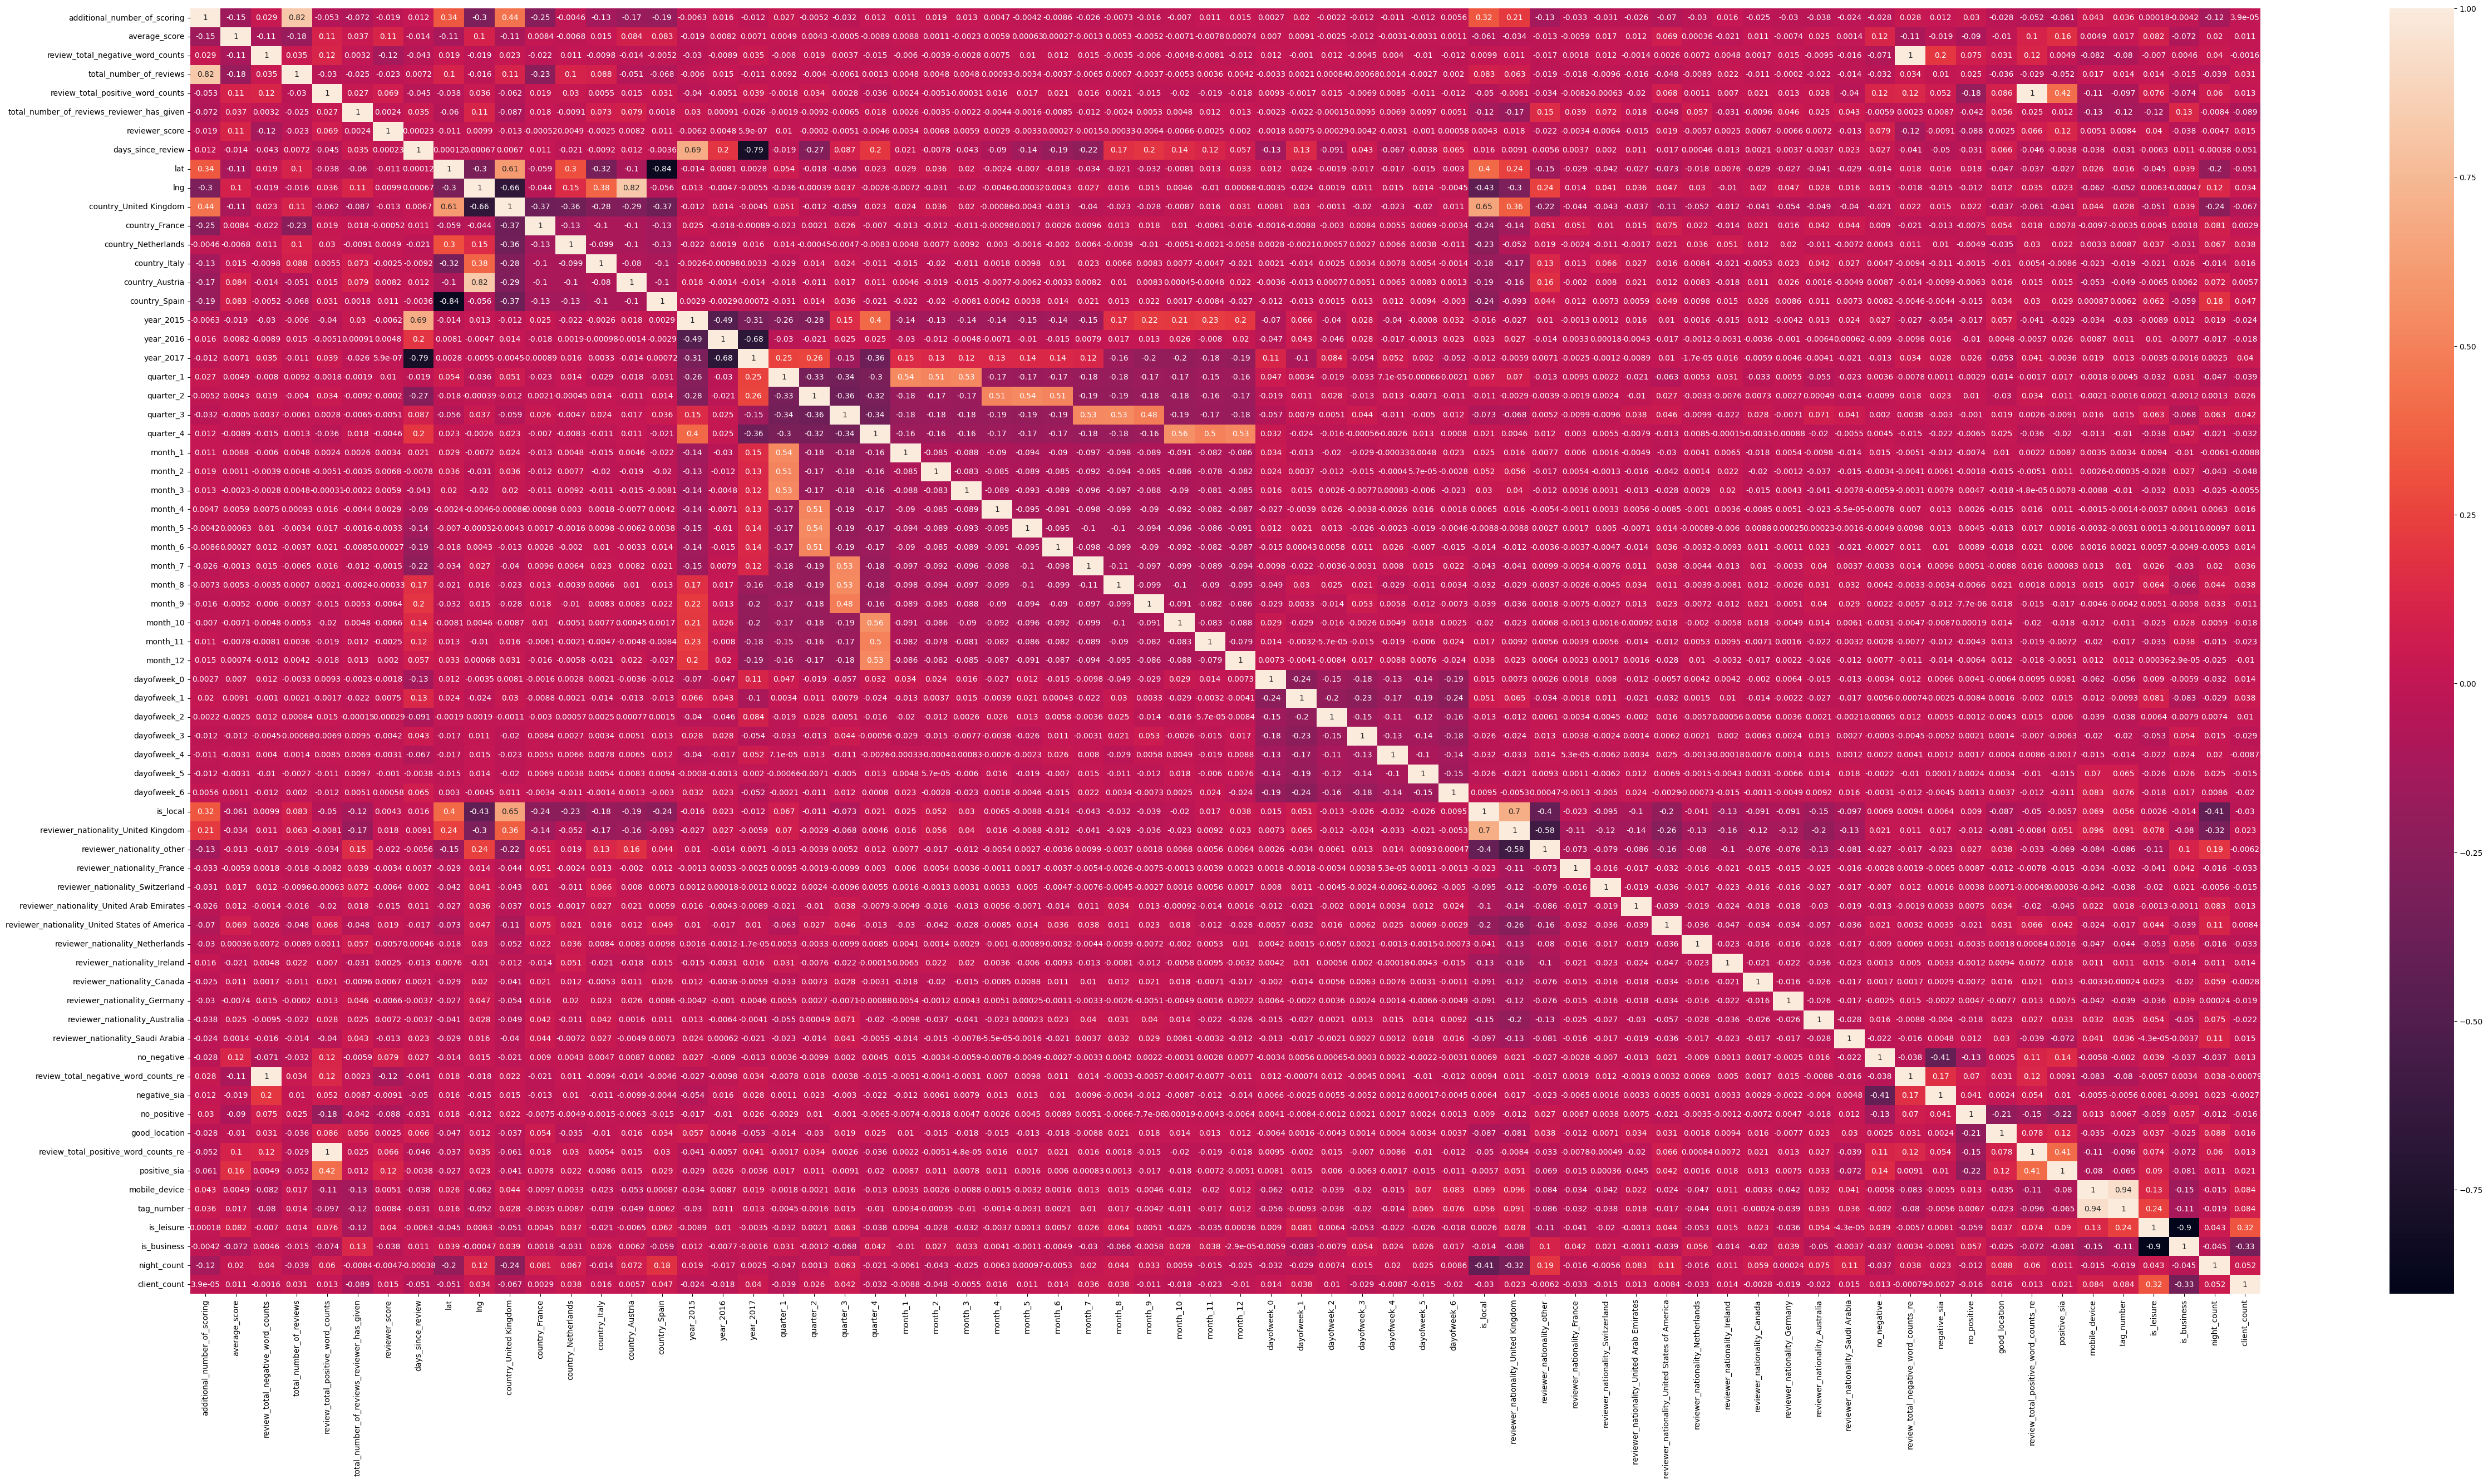

In [51]:
# Plotting a heatmap of feature correlations  
plt.rcParams['figure.figsize'] = (60, 30)  
sns.heatmap(df.drop(['sample'], axis=1).corr(), annot=True) 

<Axes: >

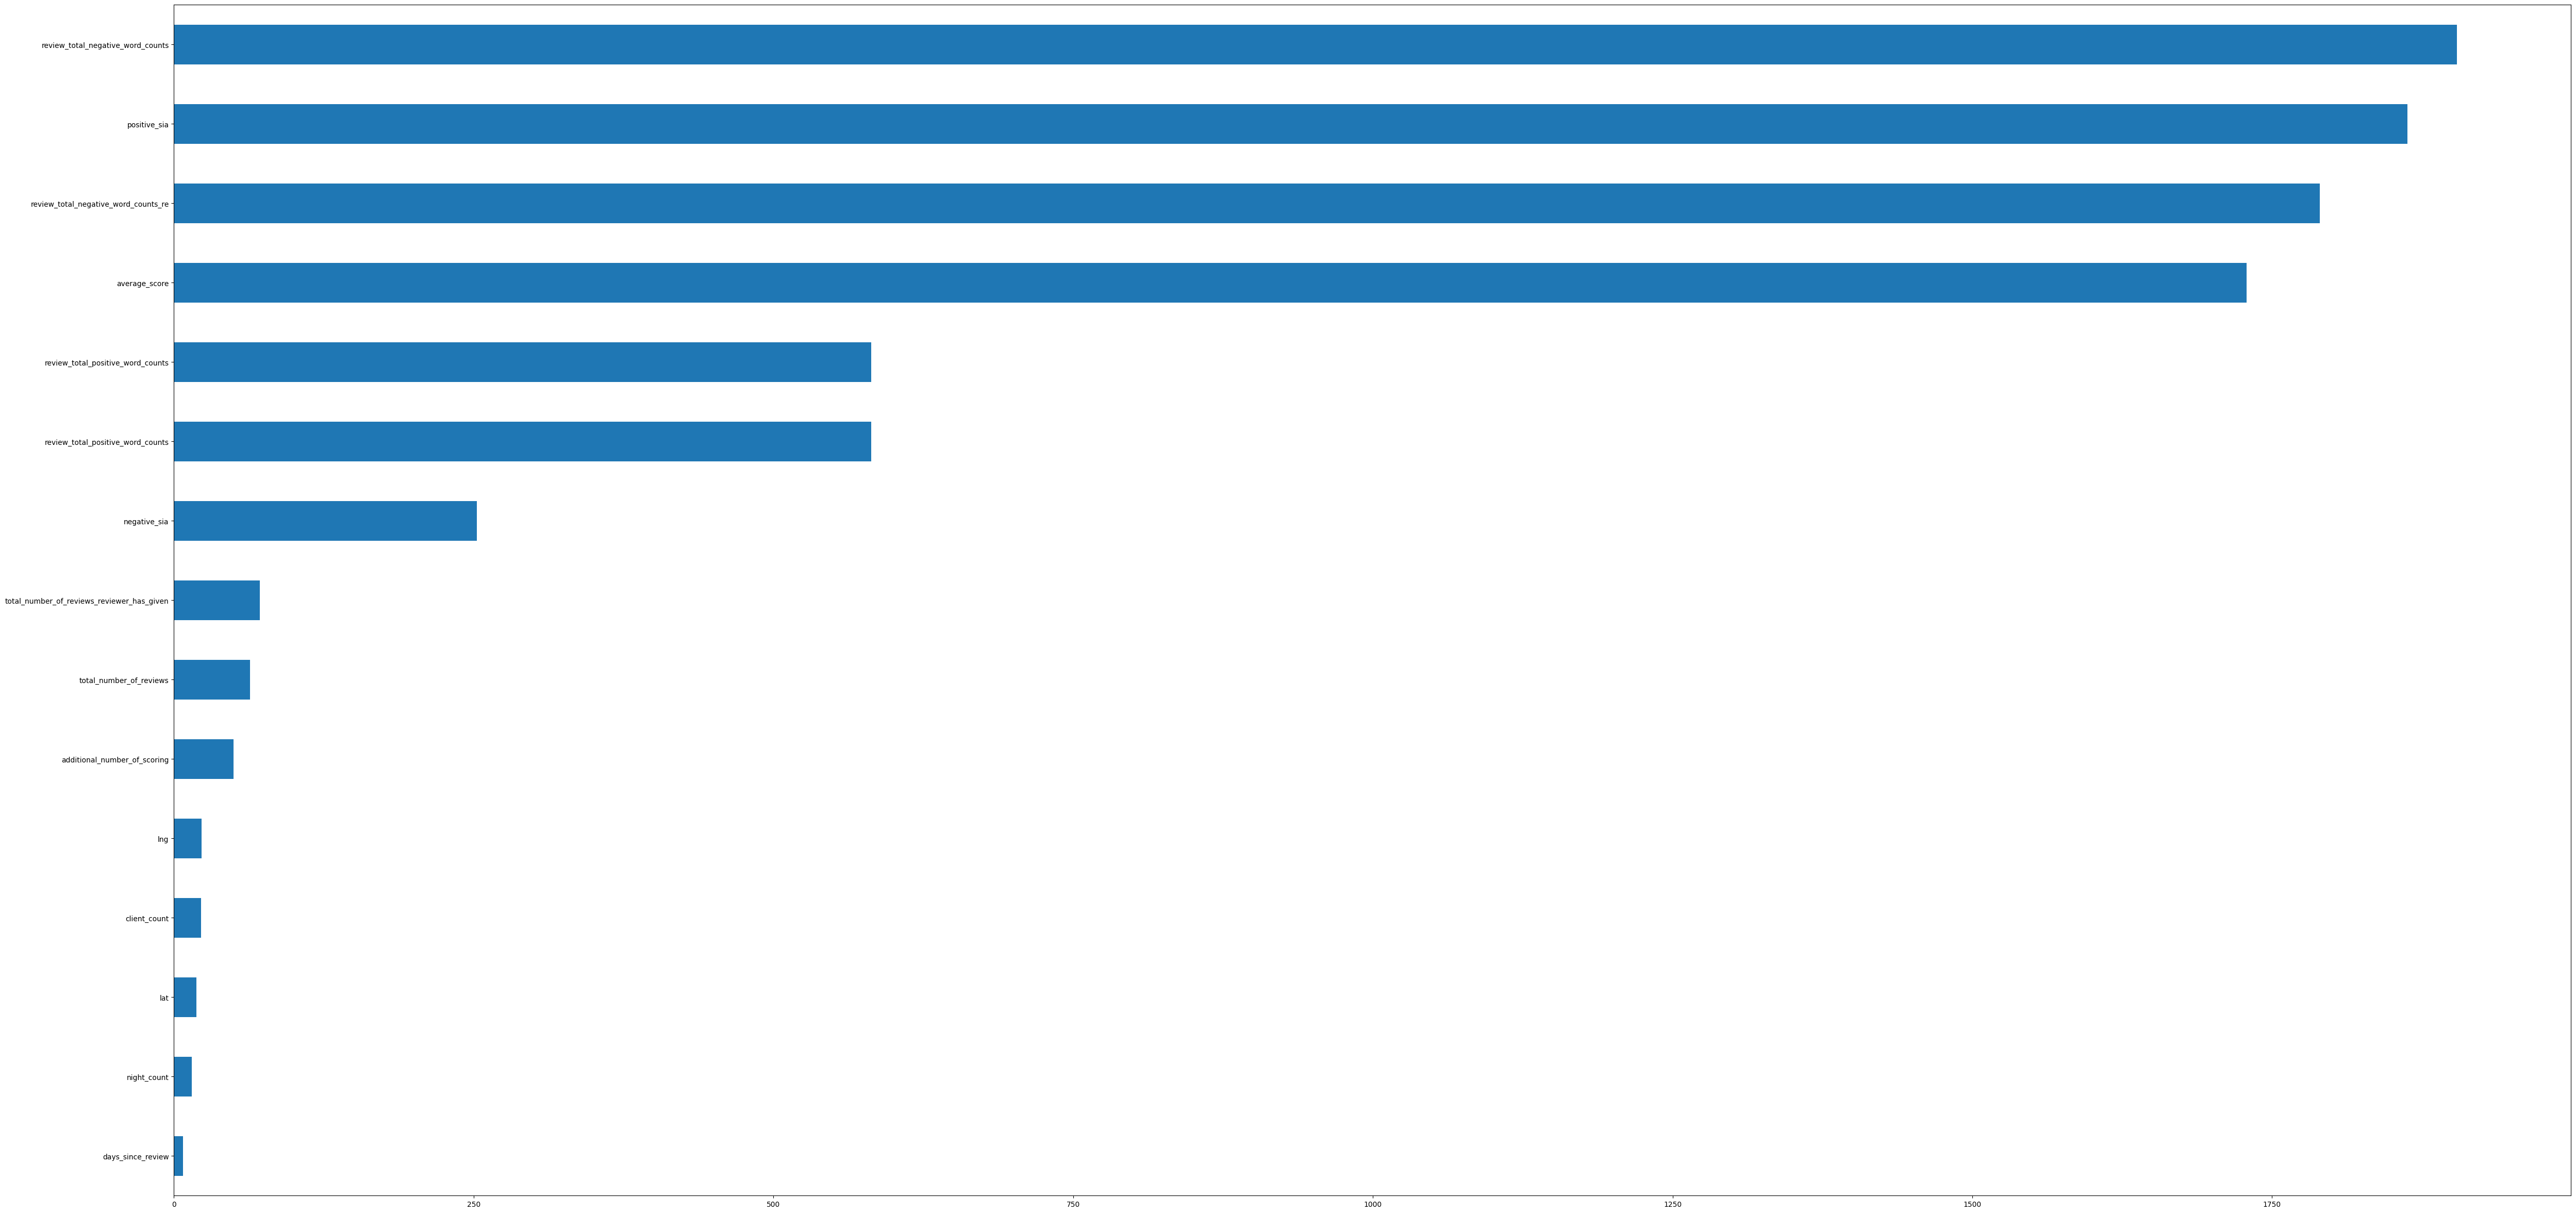

In [52]:
# To assess the impact of features on the target variable,  
# we extract the training part of the dataset and separate the target variable  
data_train = df.query('sample == 1').drop(['sample'], axis=1)  

# X — hotel data, y — target variable (hotel ratings)  
X = data_train.drop(['reviewer_score'], axis=1)  
y = data_train['reviewer_score']  

# Creating a list of numerical feature names  
num_cols = ['review_total_negative_word_counts', 'total_number_of_reviews',  
       'review_total_positive_word_counts',  
       'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'lat',  
       'additional_number_of_scoring', 'lng', 'average_score', 'night_count',  
       'client_count', 'negative_sia', 'positive_sia',  
       'review_total_negative_word_counts_re', 'review_total_positive_word_counts']  

# Plotting the relationship between the target variable and numerical features  
from sklearn.feature_selection import f_classif  # ANOVA  

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index=num_cols)  
imp_num.sort_values(inplace=True)  
imp_num.plot(kind='barh')  

### **Detected Multicollinearity Between Features:**  

- **additional_number_of_scoring** and **total_number_of_reviews** →  
  We will keep **total_number_of_reviews**, as it has a stronger impact on the target variable.  
- **review_total_negative_word_counts** and **review_total_negative_word_counts_re** →  
  We will keep the original feature, as it accounts for word significance.  
- **review_total_positive_word_counts** and **review_total_positive_word_counts_re** →  
  We will keep the original feature, as it accounts for word significance.  
- **lat** and **country_Spain** → We will keep both features.  
- **year_2017** and **days_since_review** → We will keep both features.  
- **country_Austria** and **lng** → We will keep both features.  
- **mobile_device** and **tag_number** → We will keep **mobile_device**.  
- **is_leisure** and **is_business** →  
  We will keep **is_leisure**, as it has more filled values.  


In [53]:
# Removing features led to a decrease in prediction accuracy,  
# so I decided to keep all features as they are.  

# cols_to_drop = ['additional_number_of_scoring', 'review_total_negative_word_counts_re',  
#                 'review_total_positive_word_counts_re', 'tag_number', 'is_business']  
# df = df.drop(cols_to_drop, axis=1)  

### **Feature Transformation**

In [54]:
# Recreating the list of numerical features in case it has changed  
num_cols = ['review_total_negative_word_counts', 'total_number_of_reviews',  
       'review_total_positive_word_counts',  
       'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'lat',  
       'additional_number_of_scoring', 'lng', 'average_score', 'night_count',  
       'client_count', 'negative_sia', 'positive_sia',  
       'review_total_negative_word_counts_re', 'review_total_positive_word_counts']  

In [55]:
# We will use RobustScaler since we did not perform data cleaning  

# Initializing the RobustScaler  
r_scaler = preprocessing.RobustScaler()  
# Scaling the dataset  
df[num_cols] = r_scaler.fit_transform(df[num_cols])  

In [56]:
# Creating a list of feature names to restore the dataframe after standardization  
col_names = list(df.columns)  

# Initializing the StandardScaler  
s_scaler = preprocessing.StandardScaler()  
df_s = df.copy()  
df_s['sample'] = df_s['sample'].astype(int)  

# Scaling the dataset  
df_s = s_scaler.fit_transform(df_s)  
df_s = pd.DataFrame(df_s, columns=col_names)  
df_s['sample'] = df['sample']  
df_s['reviewer_score'] = df['reviewer_score']  

## **Splitting the data into training and test sets** 

In [57]:
# Creating train and test DataFrames  
data_train = df_s.query('sample == 1').drop(['sample'], axis=1)  
data_test = df_s.query('sample == 0').drop(['sample'], axis=1) 

In [58]:
%%time  
# Splitting the dataset for model training and testing  
# X — hotel data, y — target variable (hotel ratings)  
X = data_train.drop(['reviewer_score'], axis=1)  
y = data_train['reviewer_score']  

# Data labeled "train" will be used for training the model,  
# while "test" will be used for evaluation.  
# We allocate 25% of the original dataset for testing.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)  

# Creating the model  
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)  

# Training the model on the training dataset  
regr.fit(X_train, y_train)  

# Using the trained model to predict hotel ratings on the test dataset  
# The predicted values are stored in the variable y_pred  
y_pred = regr.predict(X_test)  

# Comparing the predicted values (y_pred) with actual values (y_test)  
# The metric used is Mean Absolute Percentage Error (MAPE),  
# which shows the average absolute percentage error of the predictions.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s


MAPE: 0.12227039769791626
CPU times: user 16min 1s, sys: 4.36 s, total: 16min 5s
Wall time: 4min 12s


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.3s finished


In [59]:
data_test.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,...,no_positive,good_location,review_total_positive_word_counts_re,positive_sia,mobile_device,tag_number,is_leisure,is_business,night_count,client_count
435261,-0.873470,-1.820383,-0.321302,-1.039881,-0.586031,-0.467917,0.0,-0.179046,0.602541,-0.653729,...,-0.299764,-0.760329,-0.580930,0.339274,0.822412,0.827804,0.484203,-0.437742,-0.902042,-0.240743
391811,0.051386,1.099150,-0.354982,-0.436729,-0.494301,-0.558508,0.0,-1.629396,0.604632,-0.637574,...,-0.299764,-0.760329,-0.534334,-1.733163,0.822412,0.827804,0.484203,-0.437742,-0.902042,-0.240743
503049,-0.022522,0.734209,-0.624425,-0.405234,-0.494301,-0.558508,0.0,1.620728,0.589884,-0.623973,...,-0.299764,-0.760329,-0.487738,-1.286023,0.822412,0.827804,0.484203,-0.437742,-0.902042,1.898717
434265,-0.549870,-0.360616,0.082862,-0.373738,-0.723626,2.068606,0.0,-0.853962,-2.327106,-0.153696,...,-0.299764,1.315221,-0.720719,-1.733163,0.822412,0.827804,0.484203,-0.437742,0.457162,-1.310473
428918,-0.046493,0.916680,-0.354982,-0.318083,-0.815355,-0.377327,0.0,-1.691622,0.598826,-0.646403,...,3.335962,-0.760329,-0.674123,-0.740169,0.822412,0.827804,0.484203,-0.437742,-0.902042,-0.240743
473215,-0.841509,1.281621,0.015501,-1.038155,0.514726,1.253295,0.0,1.481915,-0.162611,-0.127749,...,-0.299764,-0.760329,0.490785,0.949090,0.822412,0.827804,-2.065248,2.284448,-0.222440,-1.310473
457702,-0.326147,0.186796,-0.388663,-0.776703,0.285401,-0.467917,0.0,-1.667689,0.608931,-0.699010,...,-0.299764,-0.760329,0.257803,-0.241919,0.822412,0.827804,0.484203,-0.437742,-0.902042,-0.240743
493588,-0.603803,1.646563,-0.624425,-0.782312,0.010212,-0.105557,0.0,-0.471031,0.603091,-0.646735,...,-0.299764,-0.760329,-0.021775,0.952594,-1.215935,-1.094601,0.484203,-0.437742,-0.902042,-0.240743
448849,-0.278206,1.646563,-0.624425,-0.453123,-0.540166,0.437984,0.0,-1.428357,0.599640,-0.646842,...,-0.299764,-0.760329,-0.580930,-0.022000,0.822412,0.827804,0.484203,-0.437742,0.457162,1.898717
498997,-0.028515,0.551738,0.183903,-0.448378,-0.677761,-0.105557,0.0,-0.897041,0.598582,-0.637520,...,-0.299764,-0.760329,-0.674123,-0.290693,0.822412,0.827804,0.484203,-0.437742,-0.902042,-1.310473


In [60]:
# Dropping the "reviewer_score" feature  
data_test = data_test.drop(['reviewer_score'], axis=1)  

In [61]:
# Predicting hotel ratings using the trained model  
predict_submission = regr.predict(data_test)  
display(predict_submission)   

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.0s finished


array([8.882, 7.924, 8.462, ..., 8.019, 9.589, 7.372])

In [62]:
# Saving the model's predictions to a submission file  
submission['reviewer_score'] = predict_submission  
submission.to_csv('submission.csv', index=False) 

## **Final Conclusion of the Project**  

In this Kaggle competition, the primary focus was on **data preprocessing** and **feature engineering**, rather than model selection.  

### **Key Steps:**  

1. **Data Analysis:**  
   - Removed duplicates and handled missing values (hotel coordinates).  
   - Extracted new features from addresses, dates, and reviews.  

2. **Feature Engineering:**  
   - Transformed text data using **SentimentIntensityAnalyzer** for sentiment analysis.  
   - Extracted numerical characteristics from tags.  

3. **Feature Selection and Multicollinearity Handling:**  
   - Identified highly correlated features, but removing them decreased accuracy, so they were retained.  

4. **Model Training and Evaluation:**  
   - Used **RandomForestRegressor** (as per competition rules).  
   - The final **MAPE** score was **12.23**.  

### **Conclusions:**  
- High-quality **data preprocessing** significantly improved model predictions.  
- **Sentiment analysis of reviews** contributed to a noticeable increase in accuracy.  
- The model achieved a **competitive result**, ranking in the **top 100 participants**.  